In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df= pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
df['purpose']=le.fit_transform(df['purpose'])

In [9]:
df['purpose'].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [10]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot:>

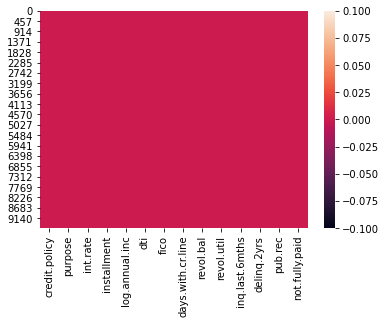

In [11]:
sns.heatmap(df.isnull())

<AxesSubplot:>

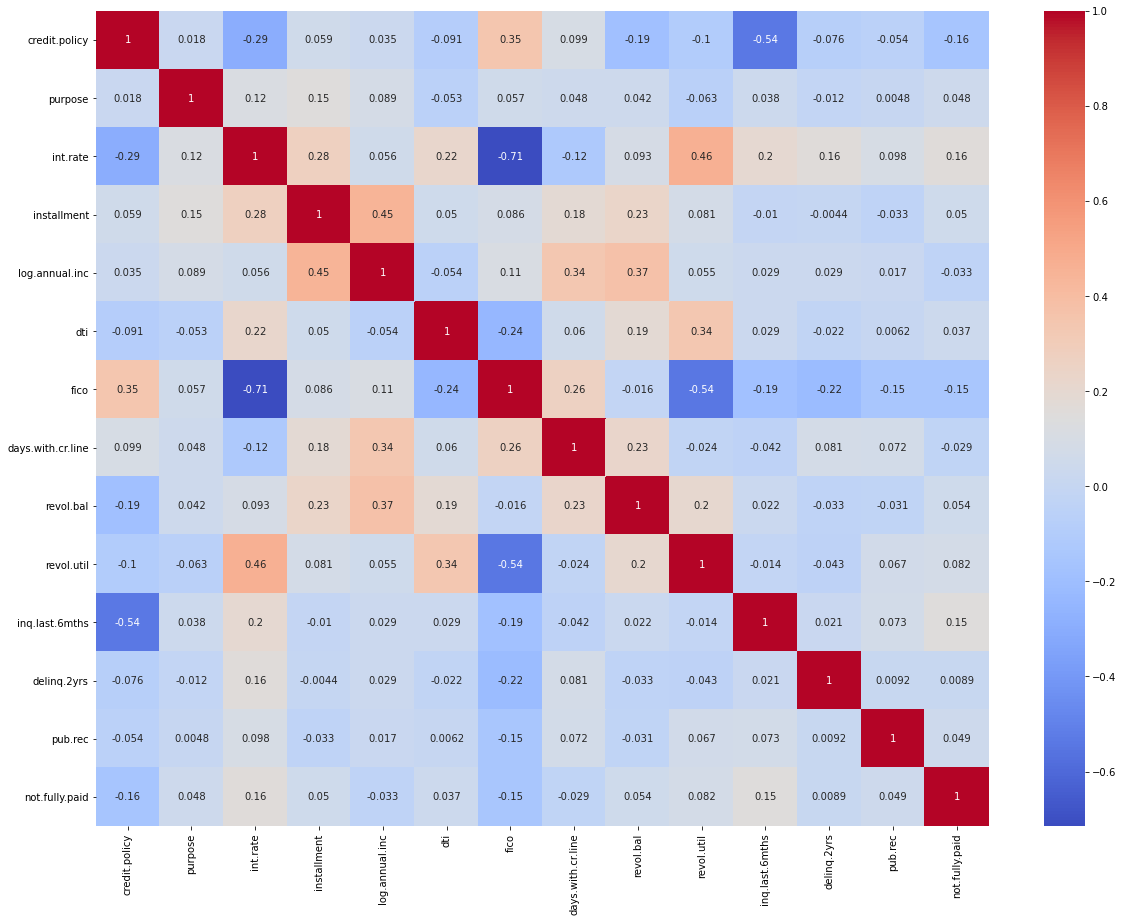

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() , annot= True, cmap='coolwarm')

In [13]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Text(0.5, 0, 'FICO')

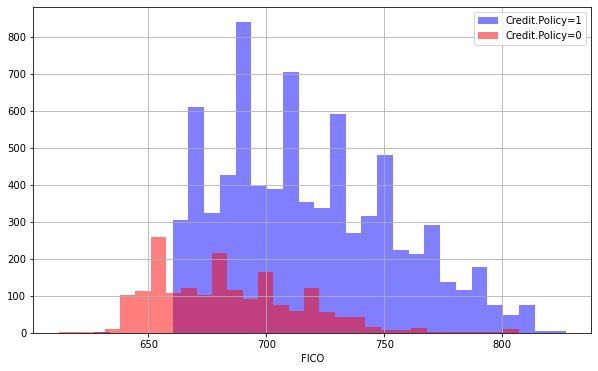

In [14]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

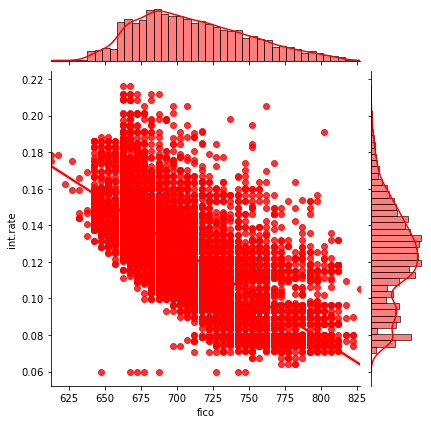

In [15]:
sns.jointplot(x='fico',y='int.rate',data=df,color='red',kind='reg')

<AxesSubplot:xlabel='purpose', ylabel='count'>

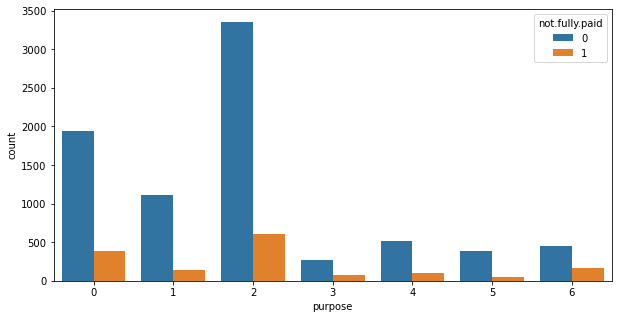

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

In [17]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [18]:
y = df['not.fully.paid']


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss=StandardScaler()

In [27]:
X=df.drop('not.fully.paid', axis=1)
X.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [28]:
scaled = ss.fit_transform(X)
scaled

array([[ 0.49222226,  0.03317632, -0.13931753, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [ 0.49222226, -0.55966463, -0.57886837, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [ 0.49222226,  0.03317632,  0.48648368, ..., -0.26247044,
        -0.29973008, -0.23700318],
       ...,
       [-2.03160257,  0.03317632, -0.57886837, ...,  2.91915909,
        -0.29973008, -0.23700318],
       [-2.03160257,  1.2188582 ,  1.39166043, ...,  1.55560358,
        -0.29973008, -0.23700318],
       [-2.03160257,  0.03317632,  0.61685894, ...,  2.01012208,
        -0.29973008, -0.23700318]])

In [29]:
x=pd.DataFrame(scaled,columns = X.columns)
x.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0.492222,0.033176,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003
1,0.492222,-0.559665,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003
2,0.492222,0.033176,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003
3,0.492222,0.033176,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003
4,0.492222,-0.559665,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dfc=DecisionTreeClassifier()

In [35]:
dfc.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
ypred = dfc.predict(X_test)
ypred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn.model_selection import cross_val_score
cross= cross_val_score(dfc,X,y,cv=10)
cross.mean()

0.7103451548091962

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [45]:
print(confusion_matrix(ypred,y_test))

[[2009  366]
 [ 386  113]]


In [46]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2375
           1       0.24      0.23      0.23       499

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.73      0.74      0.74      2874



In [47]:
print(accuracy_score(ypred,y_test))

0.7383437717466945


[Text(335.0948515067417, 1071.6685714285716, 'X[0] <= -0.77\ngini = 0.265\nsamples = 6704\nvalue = [5650, 1054]'),
 Text(163.50411027849233, 1040.6057142857144, 'X[10] <= 2.237\ngini = 0.395\nsamples = 1313\nvalue = [958, 355]'),
 Text(90.78967676993625, 1009.5428571428572, 'X[6] <= -1.089\ngini = 0.376\nsamples = 1111\nvalue = [832, 279]'),
 Text(25.989500615143722, 978.48, 'X[8] <= 2.436\ngini = 0.428\nsamples = 416\nvalue = [287, 129]'),
 Text(23.992408567274353, 947.4171428571428, 'X[5] <= -1.805\ngini = 0.422\nsamples = 410\nvalue = [286, 124]'),
 Text(22.99386254333967, 916.3542857142858, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(24.99095459120904, 916.3542857142858, 'X[6] <= -2.011\ngini = 0.418\nsamples = 407\nvalue = [286, 121]'),
 Text(8.34722066882899, 885.2914285714286, 'X[4] <= -2.123\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(7.348674644894308, 854.2285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(9.345766692763673, 854.2285714285715, 'gini 

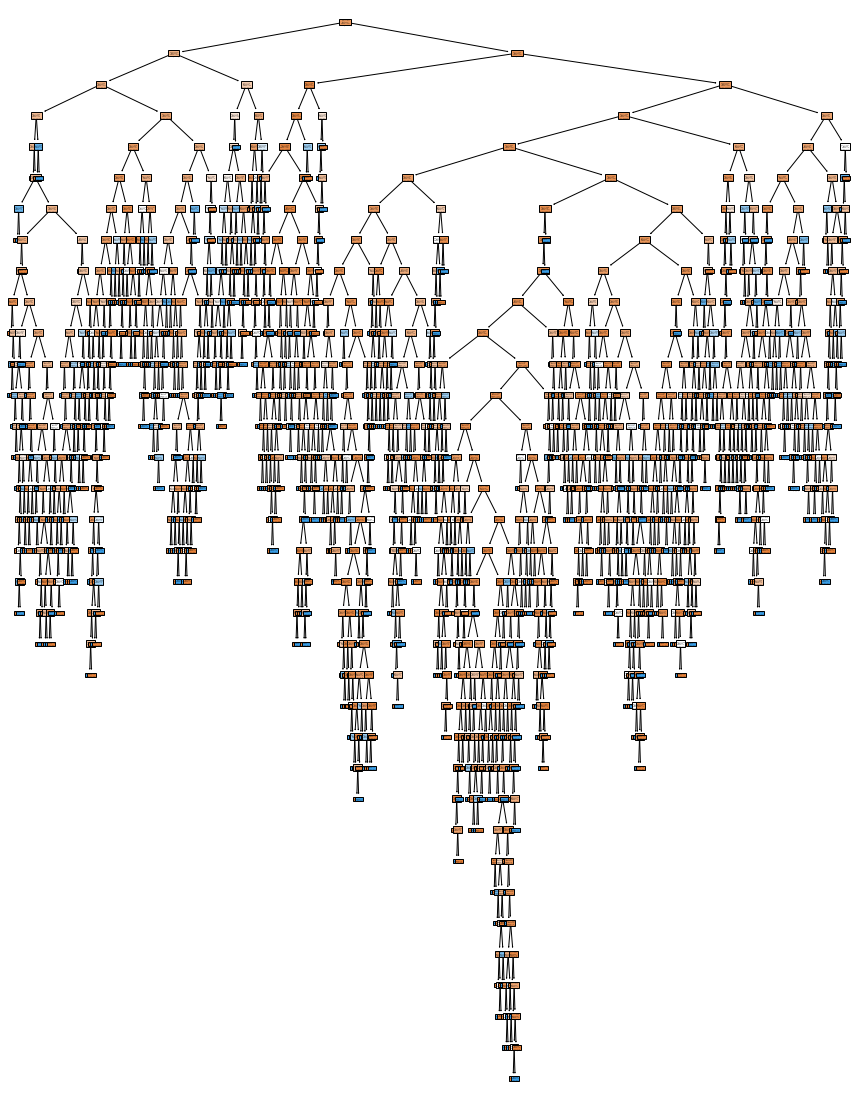

In [48]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(dfc,filled = True)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=80)
rfc.fit(X_train , y_train)

RandomForestClassifier(n_estimators=80)

In [50]:
rfc_pred=rfc.predict(X_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(confusion_matrix(rfc_pred,y_test))

[[2387  470]
 [   8    9]]


In [52]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2857
           1       0.02      0.53      0.04        17

    accuracy                           0.83      2874
   macro avg       0.51      0.68      0.47      2874
weighted avg       0.99      0.83      0.90      2874



In [54]:
print(accuracy_score(rfc_pred,y_test))

0.8336812804453723


In [55]:
from sklearn.model_selection import cross_val_score
cross= cross_val_score(rfc,X,y,cv=10)
cross.mean()

0.7954321852169379

In [56]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1267398960),
 DecisionTreeClassifier(max_features='auto', random_state=1232307888),
 DecisionTreeClassifier(max_features='auto', random_state=1717861947),
 DecisionTreeClassifier(max_features='auto', random_state=1376343829),
 DecisionTreeClassifier(max_features='auto', random_state=792554366),
 DecisionTreeClassifier(max_features='auto', random_state=373558919),
 DecisionTreeClassifier(max_features='auto', random_state=1914587470),
 DecisionTreeClassifier(max_features='auto', random_state=863057795),
 DecisionTreeClassifier(max_features='auto', random_state=395464355),
 DecisionTreeClassifier(max_features='auto', random_state=384780546),
 DecisionTreeClassifier(max_features='auto', random_state=1626850720),
 DecisionTreeClassifier(max_features='auto', random_state=774223285),
 DecisionTreeClassifier(max_features='auto', random_state=1611055182),
 DecisionTreeClassifier(max_features='auto', random_state=1069896383),
 DecisionTre

[Text(550.5200252317064, 1070.2125, 'X[10] <= 0.874\ngini = 0.266\nsamples = 4252\nvalue = [5645, 1059]'),
 Text(304.22024865832503, 1036.2375, 'X[5] <= -0.275\ngini = 0.242\nsamples = 3709\nvalue = [5056, 829]'),
 Text(89.80121269387436, 1002.2625, 'X[4] <= -2.103\ngini = 0.204\nsamples = 1554\nvalue = [2190, 285]'),
 Text(11.014883283722387, 968.2875, 'X[3] <= -0.741\ngini = 0.447\nsamples = 55\nvalue = [55, 28]'),
 Text(6.294219019269936, 934.3125, 'X[9] <= -0.262\ngini = 0.367\nsamples = 40\nvalue = [47, 15]'),
 Text(3.147109509634968, 900.3375000000001, 'X[6] <= -0.957\ngini = 0.45\nsamples = 25\nvalue = [27, 14]'),
 Text(2.098073006423312, 866.3625000000001, 'gini = 0.0\nsamples = 5\nvalue = [10, 0]'),
 Text(4.196146012846624, 866.3625000000001, 'X[7] <= -0.925\ngini = 0.495\nsamples = 20\nvalue = [17, 14]'),
 Text(3.147109509634968, 832.3875, 'X[4] <= -3.702\ngini = 0.486\nsamples = 14\nvalue = [10, 14]'),
 Text(2.098073006423312, 798.4125, 'gini = 0.0\nsamples = 3\nvalue = [4, 

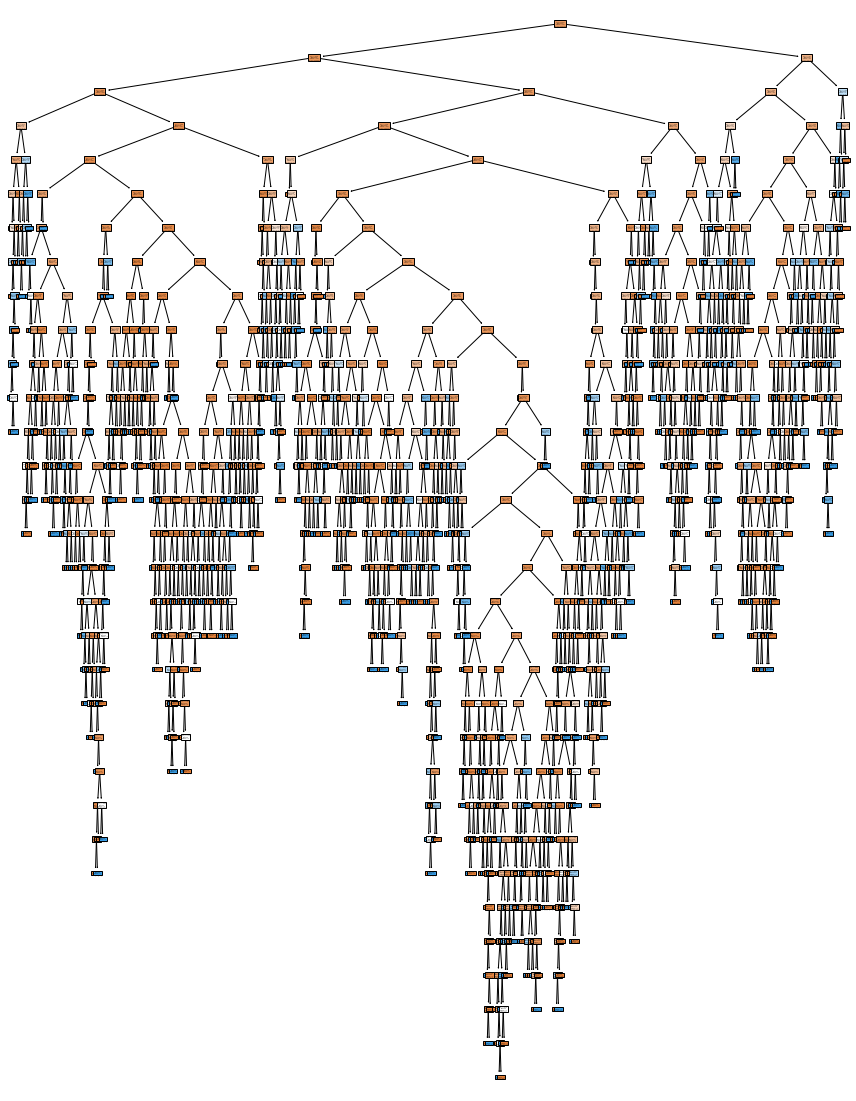

In [57]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(rfc.estimators_[2],filled = True)